In [10]:
import os
os.chdir('C:/pytest/')

In [19]:
def read_data(filename, encoding='cp949'):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data

def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)


data = read_data('ratings.txt', encoding='cp949')

In [3]:
from tqdm import tqdm
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  c:\project\venv\lib\site-packages
classpath:  c:\project\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [4]:
morphed_data=''
for data_each in tqdm(data):
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:
        morphed_data += data_each[0]+'\t'+joined_data_each+'\t'+data_each[2]+'\n'

write_data(morphed_data, 'ratings_morphed.txt', encoding='cp949')

100%|██████████| 200000/200000 [02:25<00:00, 1375.06it/s]


In [20]:
data = read_data('ratings_morphed.txt', encoding='cp949')
print(len(data))
print(len(data[0]))
print(data[0])

197559
3
['8132799', '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사', '1']


In [21]:
import random
import math
import numpy as np
random.shuffle(data)

part_num = math.floor(len(data) * 1/3)
data = data[:part_num]
print(len(data))

65853


In [22]:
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

In [23]:
from sklearn.model_selection import train_test_split
train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(data_text, data_senti, stratify=data_senti)

In [24]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq:', train_data_senti_freq)

test_data_senti_freq = Counter(test_data_senti)
print('test_data_senti_freq:', test_data_senti_freq)

train_data_senti_freq: Counter({'0': 24748, '1': 24641})
test_data_senti_freq: Counter({'0': 8250, '1': 8214})


In [25]:
import numpy as np
text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len), 1))
print('중위수길이:', np.median(text_len))
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 100]))

print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 1
최대길이: 60
평균길이: 8.8
중위수길이: 7.0
구간별 최대 길이: [ 1.  4.  7. 11. 18. 60.]
최소길이 문장: 최악
최대길이 문장: ㄹ ㅇ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ 꼴리 건들 물 ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ


In [29]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np
import math

In [30]:
max_words = 10000
maxlen = 20

In [31]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [32]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
# print('word_index: ', word_index)

전체에서 21874개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>


In [33]:
data = tokenizer.texts_to_sequences(train_data_text)

print('data 0:', data[0])
print('texts 0:', train_data_text[0])

data 0: [315, 2646, 81, 208, 140, 1290, 427, 2271]
texts 0: 중간 군더더기 보이 조금 아쉽 쥬 리 커버


In [34]:
data = pad_sequences(data, maxlen=maxlen)

print('data:', data)
print('data 0:', data[0])
print('data 0의 길이:', len(data[0]))

data: [[   0    0    0 ... 1290  427 2271]
 [   0    0    0 ...    6    1   73]
 [  57  137 1451 ...  407 2647  107]
 ...
 [   0    0    0 ... 1831  232 8828]
 [   0    0    0 ...   59  140  140]
 [   0    0    0 ...   79   28 2545]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0  315 2646
   81  208  140 1290  427 2271]
data 0의 길이: 20


In [35]:
sample = [[5, 6, 7], [8, 9, 10]]

arr = np.zeros((len(sample), 10+1))

for i, seq in enumerate(sample):
    arr[i, seq] = 1.

arr

array([[0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [36]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [37]:
data = to_one_hot(data, dimension=max_words)
labels = np.asarray(train_data_senti).astype('float32')

In [38]:
print('data:', data)
print(len(data[0]))
print('data[0][0:100]:', data[0][0:100])

data: [[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]
10000
data[0][0:100]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [39]:
print(type(train_data_text))
print(type(data))
print(data.shape)

print('데이터 텐서의 차원:', data.ndim)
print('레이블 텐서의 차원:', labels.ndim)

print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

<class 'list'>
<class 'numpy.ndarray'>
(49389, 10000)
데이터 텐서의 차원: 2
레이블 텐서의 차원: 1
데이터 텐서의 크기: (49389, 10000)
레이블 텐서의 크기: (49389,)


In [40]:
validation_ratio = 0.3
validation_len = math.floor(len(train_data_text) * validation_ratio)

x_train = data[validation_len:]
y_train = labels[validation_len:]
x_val = data[:validation_len]
y_val = labels[:validation_len]

In [61]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640064    
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))
history_dict = history.history

Epoch 1/10
1081/1081 [==============================] - 8s 7ms/step - loss: 0.4400 - acc: 0.7962 - val_loss: 0.4051 - val_acc: 0.8157
Epoch 2/10
1081/1081 [==============================] - 5s 5ms/step - loss: 0.3713 - acc: 0.8383 - val_loss: 0.4007 - val_acc: 0.8197
Epoch 3/10
1081/1081 [==============================] - 6s 5ms/step - loss: 0.3564 - acc: 0.8468 - val_loss: 0.3996 - val_acc: 0.8211
Epoch 4/10
1081/1081 [==============================] - 6s 5ms/step - loss: 0.3434 - acc: 0.8547 - val_loss: 0.3994 - val_acc: 0.8253
Epoch 5/10
1081/1081 [==============================] - 6s 5ms/step - loss: 0.3311 - acc: 0.8613 - val_loss: 0.3988 - val_acc: 0.8230
Epoch 6/10
1081/1081 [==============================] - 6s 5ms/step - loss: 0.3172 - acc: 0.8698 - val_loss: 0.4021 - val_acc: 0.8251
Epoch 7/10
1081/1081 [==============================] - 6s 5ms/step - loss: 0.3011 - acc: 0.8783 - val_loss: 0.4063 - val_acc: 0.8238
Epoch 8/10
1081/1081 [==============================] - 6s 5ms

In [10]:
import os
os.chdir('C:/pytest/')

In [11]:
model.save('text_binary_model.h5')

NameError: name 'model' is not defined

In [66]:
import pickle
with open('text_binary_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [67]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [68]:
print('Train accuracy of each epoch:', np.round(acc, 3))
print('Validation accuracy of each epoch:', np.round(val_acc, 3))

Train accuracy of each epoch: [0.796 0.838 0.847 0.855 0.861 0.87  0.878 0.888 0.895 0.905]
Validation accuracy of each epoch: [0.816 0.82  0.821 0.825 0.823 0.825 0.824 0.822 0.818 0.815]


In [69]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc)+1)
print(epochs)

range(1, 11)


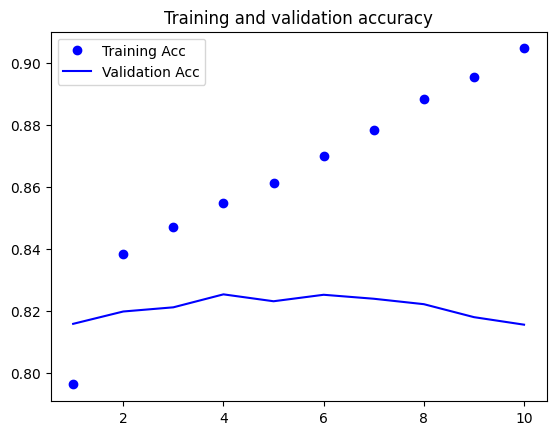

In [70]:
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

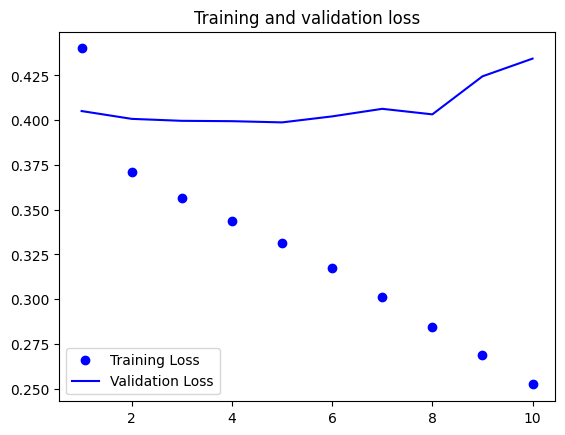

In [71]:
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
import os
from keras.models import load_model

In [13]:
filepath = 'C:/pytest/'
os.chdir(filepath)
print('Current Directory:', os.getcwd())

Current Directory: C:\pytest


In [14]:
loaded_model = load_model('text_binary_model.h5')
print('model loaded:', loaded_model)

model loaded: <keras.engine.sequential.Sequential object at 0x00000203B024C588>


In [15]:
import pickle
with open('text_binary_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [77]:
# print(test_data_text)
# print(test_data_senti)

* loaded_tokenizer.fit_on_texts(test_data_text)를 하면 안되는 이유?
    * 이미 train_data_text를 fit_on_texts하여 기준을 만들었기 때문에 test_data를 fit할 경우 기준이 달라지기 때문이다.

In [41]:
data = loaded_tokenizer.texts_to_sequences(test_data_text)
data = pad_sequences(data, maxlen=maxlen)

In [42]:
x_test = to_one_hot(data, dimension=max_words)
y_test = np.asarray(test_data_senti).astype('float32')

In [43]:
test_eval = loaded_model.evaluate(x_test, y_test)

515/515 [==============================] - 7s 8ms/step - loss: 0.3886 - acc: 0.8332


In [44]:
print('prediction model loss & acc:', test_eval)

prediction model loss & acc: [0.38859155774116516, 0.8332118391990662]


In [45]:
text = ['재미있게 잘 봤습니다']

In [46]:
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  c:\project\venv\lib\site-packages
classpath:  c:\project\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [47]:
text = [rhinoMorph.onlyMorph_list(rn,sentence,pos=['NNG','NNP','NP','VV','VA','XR','IC','MM','MAG', 'MAJ'], eomi=False) for sentence in text]
print('형태소 분석 결과:', text)

형태소 분석 결과: [['재미있', '잘', '보']]


In [48]:
data = loaded_tokenizer.texts_to_sequences(text)
print(data)
data = pad_sequences(data, maxlen=maxlen)
print(data)
x_test = to_one_hot(data, dimension=max_words)
print(x_test)

[[6, 27, 3]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6 27  3]]
[[1. 0. 0. ... 0. 0. 0.]]


In [49]:
prediction = loaded_model.predict(x_test)
print('Result:', prediction)

1/1 [==============================] - 0s 182ms/step
Result: [[0.9658135]]


In [50]:
def judge(pred):
    if pred >= 0.5:
        print('긍정일것이며, 확률은 %2d%%입니다.' %(pred*100))

    else:
        print('부정일것이며, 확률은 %2d%%입니다.' %(pred*100))

    return

In [51]:
judge(prediction)

긍정일것이며, 확률은 96%입니다.


In [74]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
texts = ['우리 소망 꿈 통일']
tokenizer = Tokenizer(num_words=4)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
data = tokenizer.texts_to_sequences(texts)
print(word_index)   # {'우리': 1, '소망': 2, '꿈': 3, '통일': 4}
print(data)            # [[1, 2, 3]]
print(tokenizer.texts_to_matrix(texts, mode='binary'))  # [[0. 1. 1. 1.]]
print(to_categorical(data, num_classes=4))  # [[[0. 1. 0. 0.] [0. 0. 1. 0.] [0. 0. 0. 1.]]]  #차원증가

{'우리': 1, '소망': 2, '꿈': 3, '통일': 4}
[[1, 2, 3]]
[[0. 1. 1. 1.]]
[[[0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]


In [52]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np
import math

In [53]:
max_words = 10000
maxlen = 20

In [54]:
tokenizer = Tokenizer(num_words=maxlen)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [55]:
print(train_data_text[0])
data = tokenizer.texts_to_matrix(train_data_text, mode='binary')
labels = np.asarray(train_data_senti).astype('float32')

중간 군더더기 보이 조금 아쉽 쥬 리 커버


In [56]:
print('data:', data)
print(len(data[0]))
print('data [0][0"100]:', data[0][0:100])

data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
20
data [0][0"100]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
